### This workbooks is a first cut to a tool to pre-select sources to be spectroscopically analyzed with SAMOS.

It is based on the examples of the ipyaladin module, avaialable at 
https://github.com/cds-astro/ipyaladin , in particular Example 8_Rectangular-selection.ipynb

In [1]:
import ipyaladin.aladin_widget as ipyal
import pandas as pd
from astroquery.simbad import Simbad
import astropy.units as u
from astropy import coordinates, units as u, wcs
from astroquery.vizier import Vizier
from astropy.io.votable import parse
from astropy.table import Table, Column
import numpy as np
from ipyaladin import Aladin
from ipywidgets import Layout, Box, widgets
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline


Upload and display an image in Aladin.
For a list of good surveys, check https://aladin.u-strasbg.fr/AladinLite/

In [2]:
aladin = ipyal.Aladin(target='M 42', fov=1.5, survey='P/2MASS/color')
#aladin = ipyal.Aladin(target='M 42', fov=1.5, survey='P/allWise/color')
aladin

Aladin(fov=1.5, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'ov…

Extract a source catalog from Simbad

# 1) Extract Default Simbad Table

We starr extracting the data as Simbad Table. This is a class designed to represent tables of heterogeneous data. It is better than a numpy structured array because of the ability to easily modify the structure of the table by adding or removing columns, or adding new rows of data. In addition table and column metadata are fully supported. See 
http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table

In [3]:
Simbad.SIMBAD_URL = 'http://simbad.harvard.edu/simbad/sim-script'

#To query Simbad, see https://astroquery.readthedocs.io/en/latest/simbad/simbad.html
table = Simbad.query_region("m42", radius=0.05 * u.deg)
#this defines the object "table" that we will use later
#
#How to convert a generic table in my disk to a Simbad Table?
table


MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
M 42,05 35 17.3,-05 23 28,5,5,7500.000,7500.000,90,D,,1981MNRAS.194..693L,1
NAME Ori Region,05 35 17.30,-05 23 28.0,6,6,--,--,0,D,O,,1
[FRM2016] 344,05 35 17.2210,-05 23 26.542,9,9,--,--,0,C,R,2016ApJ...822...93F,1
DOH 7 175-328,05 35 17.5,-05 23 28,5,5,--,--,0,D,,2004AJ....127.3456D,1
MAX 126,05 35 17.11,-05 23 29.3,6,6,--,--,0,D,I,2005AJ....129.1534R,1
DOH 7 171-327,05 35 17.1,-05 23 27,5,5,--,--,0,D,,2004AJ....127.3456D,1
...,...,...,...,...,...,...,...,...,...,...,...
JW 377,05 35 12.2722,-05 20 45.145,14,14,0.255,0.258,90,A,O,2018yCat.1345....0G,1


# 2) Extract Table from published dataset

In [4]:
center = coordinates.SkyCoord.from_name('Orion KL')


tablelist = Vizier.query_region(center, radius=5*u.arcmin,
                                catalog='J/ApJ/826/16/table1')
# the result is a list of tables, so we'll get the first one
result = tablelist[0]
print(tablelist[0])  # this is a table list type object.

Seq   RAJ2000     DEJ2000    Ksmag
      "h:m:s"     "d:m:s"     mag 
--- ----------- ------------ -----
  1 05 35 12.95 -05 22 44.34  14.0
  2 05 35 12.35 -05 22 41.35  14.2
  3 05 35 15.39 -05 22 39.93  14.0
  4 05 35 13.30 -05 22 39.32  13.9
  5 05 35 14.50 -05 22 38.78  14.1
  6 05 35 12.31 -05 22 34.19  14.4
...         ...          ...   ...
 34 05 35 15.19 -05 20 15.01   9.7
 35 05 35 10.98 -05 20 12.94  13.7
 36 05 35 14.17 -05 20 08.17  11.8
 37 05 35 14.21 -05 20 04.50   7.9
 38 05 35 14.25 -05 20 03.84  11.8
 39 05 35 11.90 -05 20 02.42   9.4
 40 05 35 14.84 -05 20 02.29  14.4
Length = 40 rows


# 3) READ TABLE FROM AN UNPUBLISHED, NON SIMBAD CATALOG

In [5]:
#Read a CSV file as a pandas file
catfile = 'Tables/Slimtable_F130&MainIDfixed_8782.csv'
pandacat = pd.read_csv(catfile)

#check...
pandacat.head()

#to create an astropy table, use
table1 = table.from_pandas(pandacat)
table1

index,MainID,OtherID,RA,DEC,X_mos,Y_mos,mag130,dmag130,mag139,dmag139,color,dcolor,Delta130,Delta139,Nr_IR
int64,int64,str24,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
0,0,44-1078,83.62638127,-5.457796715,10112.93708,7947.759999,9.797189999999999,0.0200096,9.77856,0.20154,-0.07713510000000001,0.115685,0.061069500000000006,0.563724,3
1,1,26-47-65,83.60899771,-5.4417766389999995,10598.80566,8397.328145,10.9083,0.018506599999999998,10.6736,0.0265132,0.240065,0.0172287,0.0611172,0.07698060000000001,4
2,2,48,83.6163478,-5.442952953,10393.40753,8364.360953,11.7239,0.0109769,11.5305,0.0177515,0.195181,0.00717064,0.0273504,0.0428772,2
3,3,122,83.63294382,-5.443574706000001,9929.648054000001,8347.017071,12.1459,0.0300123,12.1324,0.0124562,0.0306892,0.0207105,0.0713882,0.026536,2
4,4,50,83.61754036,-5.444362865,10360.073059999999,8324.792596,13.3779,0.0103522,13.4268,0.0228317,-0.053258400000000004,0.018213,0.0280094,0.0634899,2
5,5,27-49-67,83.60019909,-5.4402948989999995,10844.68505,8438.855152,13.6083,0.013171200000000001,13.1289,0.00630562,0.483117,0.00306582,0.038213699999999996,0.018191299999999997,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,8743,-,83.92383617,-5.69954177,1802.937854,1161.7564960000002,21.0545,0.160451,20.9737,0.0126738,0.309638,0.417308,0.226912,0.0251713,1
4504,8744,-,83.92183983,-5.69522258,1858.6679149999998,1283.014316,20.7109,0.0309297,20.9714,0.0660923,-0.2548,0.123321,0.0437412,0.130661,1


# 4) READ A TABLE EXTRACTED FROM VIZIER X-MATCH LIBRARY 

In [6]:
#The X-match output table is a VOTable. Must handled with care, Pandas seems to work.

#Routine is required to read VOTable => Pandas
def votable_to_pandas(votable_file):
    votable = parse(votable_file)
    table = votable.get_first_table().to_table(use_names_over_ids=True)
    return table.to_pandas()

#here we go...
catfile = 'Tables/Slimtable.csv.vot'
pandacat  = votable_to_pandas(catfile)

pandacat.head()

,index,RA,DEC,X_mos,Y_mos,mag130,dmag130,mag139,dmag139,color,dcolor,Delta130,Delta139
0,0,83.626381,-5.457797,10112.937080,7947.759999,9.79719,0.020010,9.77856,0.201540,-0.077135,0.115685,0.061069,0.563724
1,1,83.608998,-5.441777,10598.805660,8397.328145,10.90830,0.018507,10.67360,0.026513,0.240065,0.017229,0.061117,0.076981
2,2,83.616348,-5.442953,10393.407530,8364.360953,11.72390,0.010977,11.53050,0.017751,0.195181,0.007171,0.027350,0.042877
3,3,83.632944,-5.443575,9929.648054,8347.017071,12.14590,0.030012,12.13240,0.012456,0.030689,0.020710,0.071388,0.026536
4,4,83.617540,-5.444363,10360.073060,8324.792596,13.37790,0.010352,13.42680,0.022832,-0.053258,0.018213,0.028009,0.063490


One way or the other we have managed to read a catalog. Next step:

# SET THE RANKING

We select from the private dataset, using Pandas: 

1) all stars between J=12 and 15

2) With water in absorption

In [7]:
criteria=(pandacat['mag130'] > 12) & (pandacat['mag130'] < 15)
pandacat2 = pandacat[criteria]
pandacat2.head

<bound method NDFrame.head of       index         RA       DEC         X_mos        Y_mos   mag130  \
3         3  83.632944 -5.443575   9929.648054  8347.017071  12.1459   
4         4  83.617540 -5.444363  10360.073060  8324.792596  13.3779   
5         5  83.600199 -5.440295  10844.685050  8438.855152  13.6083   
6         6  83.624958 -5.421466  10152.944790  8967.553107  13.2284   
7         7  83.622401 -5.431073  10224.339930  8697.870091  13.7699   
...     ...        ...       ...           ...          ...      ...   
4440   4440  83.927963 -5.676457   1687.493805  1809.724011  14.7710   
4469   4469  83.912612 -5.683232   2116.342653  1619.672950  12.2033   
4470   4470  83.923624 -5.676921   1808.699806  1796.743379  14.5086   
4471   4471  83.927098 -5.682654   1711.707193  1635.781733  14.9022   
4490   4490  83.931691 -5.708912   1583.614537   898.662426  12.7847   

       dmag130   mag139   dmag139     color    dcolor  Delta130  Delta139  
3     0.030012  12.1324  0.01

In [8]:
# and create the astropy table...
table1 = table.from_pandas(pandacat2)
table1


index,RA,DEC,X_mos,Y_mos,mag130,dmag130,mag139,dmag139,color,dcolor,Delta130,Delta139
int16,float64,float64,float64,float64,float32,float64,float32,float64,float64,float64,float64,float64
3,83.632944,-5.443575,9929.648054,8347.017071,12.1459,0.0300123,12.1324,0.0124562,0.0306892,0.0207105,0.0713882,0.026536
4,83.61754,-5.444363,10360.07306,8324.792596,13.3779,0.0103522,13.4268,0.0228317,-0.0532584,0.018213,0.0280094,0.0634899
5,83.600199,-5.440295,10844.68505,8438.855152,13.6083,0.0131712,13.1289,0.00630562,0.483117,0.00306582,0.0382137,0.0181913
6,83.624958,-5.421466,10152.94479,8967.553107,13.2284,0.0132644,13.3092,0.0140082,-0.0934917,0.0160946,0.0340614,0.0423231
7,83.622401,-5.431073,10224.33993,8697.870091,13.7699,0.00403174,13.8486,0.00431242,-0.0787315,0.00533006,0.00882912,0.0105276
39,83.599874,-5.476306,10853.48308,7428.02447,13.8732,0.0366342,14.0238,0.038855,-0.153075,0.00249785,0.125285,0.117202
...,...,...,...,...,...,...,...,...,...,...,...,...
4438,83.931004,-5.6819,1602.595753,1656.92631,12.82,0.024724,12.7787,0.0134676,0.0355985,0.00801408,0.0710669,0.0408621
4439,83.927781,-5.678356,1692.596942,1756.420858,13.2501,0.00980722,13.231,0.0198731,0.0193659,0.0150239,0.0280943,0.0629997


In [9]:
# check...

table1['DEC']

-5.443575
-5.444363
-5.440295
-5.421466
-5.431073
-5.476306
-5.462653
-5.45479
-5.435024
...
-5.692703


In [10]:
# Check plotting all the selected sources
# first display
#aladin= ipyal.Aladin(fov= 2.5, target= 'm42', survey='P/allWise/color')
aladin = ipyal.Aladin(target='M 42', fov=1.5, survey='P/2MASS/color')
aladin

Aladin(fov=1.5, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'ov…

In [11]:
#then overplot
aladin.add_table(table1)

In [12]:
#ADD THE RANK COLUMN
col_e = Column(name='rank', data=np.zeros(1081))  # all ranks set to 0 to begin with...
table1.add_columns([col_e],indexes=[4])
table1

index,RA,DEC,X_mos,rank,Y_mos,mag130,dmag130,mag139,dmag139,color,dcolor,Delta130,Delta139
int16,float64,float64,float64,float64,float64,float32,float64,float32,float64,float64,float64,float64,float64
3,83.632944,-5.443575,9929.648054,0.0,8347.017071,12.1459,0.0300123,12.1324,0.0124562,0.0306892,0.0207105,0.0713882,0.026536
4,83.61754,-5.444363,10360.07306,0.0,8324.792596,13.3779,0.0103522,13.4268,0.0228317,-0.0532584,0.018213,0.0280094,0.0634899
5,83.600199,-5.440295,10844.68505,0.0,8438.855152,13.6083,0.0131712,13.1289,0.00630562,0.483117,0.00306582,0.0382137,0.0181913
6,83.624958,-5.421466,10152.94479,0.0,8967.553107,13.2284,0.0132644,13.3092,0.0140082,-0.0934917,0.0160946,0.0340614,0.0423231
7,83.622401,-5.431073,10224.33993,0.0,8697.870091,13.7699,0.00403174,13.8486,0.00431242,-0.0787315,0.00533006,0.00882912,0.0105276
39,83.599874,-5.476306,10853.48308,0.0,7428.02447,13.8732,0.0366342,14.0238,0.038855,-0.153075,0.00249785,0.125285,0.117202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,83.931004,-5.6819,1602.595753,0.0,1656.92631,12.82,0.024724,12.7787,0.0134676,0.0355985,0.00801408,0.0710669,0.0408621
4439,83.927781,-5.678356,1692.596942,0.0,1756.420858,13.2501,0.00980722,13.231,0.0198731,0.0193659,0.0150239,0.0280943,0.0629997


In [13]:
# set a ranking metric: from bright and red (good) to faint and blue (bad)
table1['rank']=table1['mag130']-50*table1['color']
table1['rank','color']

#... but for the moment I don't use it... 

rank,color
float64,float64
10.611439772644044,0.0306892
16.04082012359619,-0.0532584
-10.54754979095459,0.483117
17.902985230407715,-0.0934917
17.70647532196045,-0.0787315
21.52695041656494,-0.153075
...,...
11.040074694824218,0.0355985
12.281805135803223,0.0193659


### The next two cells are the Example 8 and the core of the entire process

Once the cell below has been executed, you will see the Select button.

Run the following cell, then press and drag a rectangle enclosing the sources you wish to select. 

For SAMOS make sure you select a BOX ~3' X 3'.

You will  see their names in the table at the right of the ipyaladin view.

In [19]:


#aladin = Aladin(layout=Layout(width='50%'), target='M 42', fov=0.05)  #FoV=3'
#aladin = Aladin(layout=Layout(width='50%'), target='M 42', fov=0.05, survey='P/allWise/color')
aladin = Aladin(layout=Layout(width='50%'), target='M 42', fov=0.06, survey='P/2MASS/color')


button = widgets.Button(description="Select")
def on_button_clicked(b):
    aladin.rectangular_selection()
    
button.on_click(on_button_clicked)
table_info = widgets.HTML(layout=Layout(height='auto', overflow='auto'))


box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='100%',
                    position='relative',
                    overflow='hidden',
                    height='140vh',
                    margin='-100px 0 -350px 0',
                    padding='100px 0 0 0 '
                   )
box = Box(children=[aladin, button, table_info], layout=box_layout)
box



Box(children=(Aladin(fov=0.06, layout=Layout(width='50%'), options=['allow_full_zoomout', 'coo_frame', 'fov', …

first [50.]
secondo [  50. 1358. 1490. 1540. 1564. 1588. 1589. 1590. 1591. 1592. 1593. 1594.
 1595. 1596. 1597. 1598. 2009. 2010. 2011. 2015. 2016. 2019. 2125. 2128.
 2134. 2143. 2163. 2169. 2177. 2182. 2287. 2288. 2289. 2291. 2292. 2293.
 2294. 2295. 2296. 2311. 2312. 2313. 2314. 2315. 2332.]


In [20]:
#global indici
# indici needs to be defined inside the function

aladin.add_table(table1)

def process_result(sources):
    global indici
    indici = np.empty(1)
    print("first", indici)
    s = '<table border="1">'
    s += '<tr><th>MAIN_ID</th><th>RA</th><th>DEC</th></tr>'
    for source in sources:
        s += '<tr><td>%s</td><td>%s</td><td>%s</td></tr>' % (source['data']['index'], source['data']['RA'], source['data']['DEC'])
        var = source['data']['index']
        indici = np.append(indici,var)
    s += '</table>'
    table_info.value = s    
    print("secondo",indici)

    
aladin.add_listener('select', process_result)

#print(indici)

## Print the list of selected targets

In [22]:
indici=indici[1:] #remove initial NAN introduced by the creation of the array...
print(indici)
print("Selected",len(indici)," sources")

[1358. 1490. 1540. 1564. 1588. 1589. 1590. 1591. 1592. 1593. 1594. 1595.
 1596. 1597. 1598. 2009. 2010. 2011. 2015. 2016. 2019. 2125. 2128. 2134.
 2143. 2163. 2169. 2177. 2182. 2287. 2288. 2289. 2291. 2292. 2293. 2294.
 2295. 2296. 2311. 2312. 2313. 2314. 2315. 2332.]
Selected 44  sources


In [23]:
targetlist = pandacat[pandacat['index'].isin(indici)]

#sorted table
targetlist = targetlist.sort_values(by=['RA'])
print(targetlist)
targetlist

      index         RA       DEC        X_mos         Y_mos   mag130  \
2009   2009  83.740774 -5.380877  6916.564431  10107.352140  12.3581   
2011   2011  83.746619 -5.385512  6753.189948   9977.255641  12.7751   
1594   1594  83.747096 -5.392305  6739.853324   9786.561323  13.8071   
1591   1591  83.747113 -5.392456  6739.403723   9782.319944  13.2541   
1540   1540  83.748119 -5.400051  6711.271174   9569.141950  12.3420   
1596   1596  83.750852 -5.402563  6634.887250   9498.628960  14.8182   
1588   1588  83.754030 -5.402951  6546.078728   9487.746412  12.2090   
1592   1592  83.754461 -5.384468  6534.057435  10006.576000  13.4240   
1590   1590  83.756658 -5.402808  6472.641132   9491.767323  12.8322   
1597   1597  83.757737 -5.398237  6442.485337   9620.058548  14.7566   
1595   1595  83.758838 -5.399149  6411.719865   9594.461975  14.8993   
1593   1593  83.764323 -5.392435  6258.437644   9782.936112  13.7218   
2015   2015  83.765413 -5.379362  6227.979213  10149.883680  13.

,index,RA,DEC,X_mos,Y_mos,mag130,dmag130,mag139,dmag139,color,dcolor,Delta130,Delta139
2009,2009,83.740774,-5.380877,6916.564431,10107.352140,12.3581,0.011369,12.3092,0.014394,0.042854,0.003037,0.029876,0.038626
2011,2011,83.746619,-5.385512,6753.189948,9977.255641,12.7751,0.015242,12.9322,0.019140,-0.169411,0.009910,0.031220,0.044720
1594,1594,83.747096,-5.392305,6739.853324,9786.561323,13.8071,0.049280,13.8112,0.024639,-0.031127,0.032271,0.129291,0.059111
1591,1591,83.747113,-5.392456,6739.403723,9782.319944,13.2541,0.016286,13.2741,0.026731,-0.031339,0.008292,0.038000,0.071068
1540,1540,83.748119,-5.400051,6711.271174,9569.141950,12.3420,0.010588,12.2983,0.026462,0.042544,0.026241,0.025415,0.074294
1596,1596,83.750852,-5.402563,6634.887250,9498.628960,14.8182,0.011508,14.6783,0.015502,0.139903,0.004004,0.023000,0.031000
1588,1588,83.754030,-5.402951,6546.078728,9487.746412,12.2090,0.002968,12.1020,0.000000,0.105439,0.001503,0.005937,0.000000
1592,1592,83.754461,-5.384468,6534.057435,10006.576000,13.4240,0.025443,13.4958,0.021740,-0.047130,0.040943,0.081000,0.065351
1590,1590,83.756658,-5.402808,6472.641132,9491.767323,12.8322,0.006909,12.9353,0.008467,-0.102861,0.001807,0.013657,0.015933
1597,1597,83.757737,-5.398237,6442.485337,9620.058548,14.7566,0.013537,14.8610,0.026494,-0.104399,0.023564,0.032527,0.064000


### Default slit width

In [24]:
Slit_Width_pix = 7 #pixels; this affects the total nr. of spectra in a dense field
Slit_Size_pix = 3 #pixels; this affect the resolution of the spectra
targetlist['slit_width']=7
targetlist['slit_size']=3

In [25]:

Slit_Width_arcsec = Slit_Width_pix * 180./1024 #scale...
print(Slit_Width_arcsec)
#assume we disperse along the DEC axis...
slit_centers  = targetlist['RA']  # in degrees
targetlist['slit_left'] = slit_centers - Slit_Width_arcsec/2. / 3600.  
targetlist['slit_right'] = slit_centers + Slit_Width_arcsec/2. / 3600.  

#center of mass of the targets system
#print(min(targetlist['slit_left']))
#print(max(targetlist['slit_right']))
centerfield = (min(targetlist['slit_left'])+max(targetlist['slit_left']))/2.
print(centerfield)

#range in pixels of the targets
range_pixels = (max(targetlist['slit_left'])-min(targetlist['slit_left']))*3600./180.*1024
print(range_pixels)
print("targs", len(targetlist))
good_index = [0]
pix_right = []
pix_left = []
j=0
for i in range(0,len(targetlist['RA'])-1):
    if j-i >= 1:
        continue
    j=i+1
    print(j,i)
    while ((targetlist.iloc[j]['slit_left'] < targetlist.iloc[i]['slit_right']) & (j<len(targetlist)-1)):
        print('skipping',j)
        j = j+1
    print('accepting',j)    
    good_index.append(j)
#    print(j,'-left: ',targetlist.iloc[j]['slit_left'],j,'-right:', targetlist.iloc[j]['slit_right'])
    
    pix_left.append( (targetlist.iloc[i]['slit_left']-centerfield)*3600./180.*1024)
    pix_right.append( (targetlist.iloc[i]['slit_right']-centerfield)*3600./180.*1024)
#    print(pix_left,pix_right)     
pix_center = (np.array(pix_left)+np.array(pix_right))/2.
for i in range(len(pix_right)):
    print(good_index[i],int(pix_left[i]),int(pix_center[i]),int(pix_right[i]))
print(len(pix_right))    

1.23046875
83.7673246015625
1094.51264000003
targs 44
1 0
accepting 1
2 1
accepting 2
3 2
skipping 3
accepting 4
5 4
accepting 5
6 5
accepting 6
7 6
accepting 7
8 7
accepting 8
9 8
accepting 9
10 9
accepting 10
11 10
accepting 11
12 11
accepting 12
13 12
accepting 13
14 13
accepting 14
15 14
accepting 15
16 15
accepting 16
17 16
skipping 17
accepting 18
19 18
accepting 19
20 19
accepting 20
21 20
skipping 21
accepting 22
23 22
skipping 23
accepting 24
25 24
accepting 25
26 25
accepting 26
27 26
accepting 27
28 27
skipping 28
accepting 29
30 29
skipping 30
skipping 31
accepting 32
33 32
skipping 33
accepting 34
35 34
accepting 35
36 35
accepting 36
37 36
accepting 37
38 37
accepting 38
39 38
skipping 39
accepting 40
41 40
skipping 41
skipping 42
accepting 43
0 -547 -543 -540
1 -427 -424 -420
2 -417 -414 -410
4 -396 -393 -389
5 -340 -337 -333
6 -275 -272 -268
7 -266 -263 -259
8 -221 -218 -214
9 -199 -196 -192
10 -177 -173 -170
11 -64 -61 -57
12 -42 -39 -35
13 -2 0 4
14 11 14 18
15 52 56 

In [26]:
finallist = targetlist.iloc[good_index]
finallist

,index,RA,DEC,X_mos,Y_mos,mag130,dmag130,mag139,dmag139,color,dcolor,Delta130,Delta139,slit_width,slit_size,slit_left,slit_right
2009,2009,83.740774,-5.380877,6916.564431,10107.352140,12.3581,0.011369,12.3092,0.014394,0.042854,0.003037,0.029876,0.038626,7,3,83.740603,83.740945
2011,2011,83.746619,-5.385512,6753.189948,9977.255641,12.7751,0.015242,12.9322,0.019140,-0.169411,0.009910,0.031220,0.044720,7,3,83.746448,83.746790
1594,1594,83.747096,-5.392305,6739.853324,9786.561323,13.8071,0.049280,13.8112,0.024639,-0.031127,0.032271,0.129291,0.059111,7,3,83.746925,83.747267
1540,1540,83.748119,-5.400051,6711.271174,9569.141950,12.3420,0.010588,12.2983,0.026462,0.042544,0.026241,0.025415,0.074294,7,3,83.747948,83.748290
1596,1596,83.750852,-5.402563,6634.887250,9498.628960,14.8182,0.011508,14.6783,0.015502,0.139903,0.004004,0.023000,0.031000,7,3,83.750681,83.751023
1588,1588,83.754030,-5.402951,6546.078728,9487.746412,12.2090,0.002968,12.1020,0.000000,0.105439,0.001503,0.005937,0.000000,7,3,83.753859,83.754201
1592,1592,83.754461,-5.384468,6534.057435,10006.576000,13.4240,0.025443,13.4958,0.021740,-0.047130,0.040943,0.081000,0.065351,7,3,83.754290,83.754632
1590,1590,83.756658,-5.402808,6472.641132,9491.767323,12.8322,0.006909,12.9353,0.008467,-0.102861,0.001807,0.013657,0.015933,7,3,83.756487,83.756829
1597,1597,83.757737,-5.398237,6442.485337,9620.058548,14.7566,0.013537,14.8610,0.026494,-0.104399,0.023564,0.032527,0.064000,7,3,83.757566,83.757908
1595,1595,83.758838,-5.399149,6411.719865,9594.461975,14.8993,0.005460,14.4126,0.002752,0.492839,0.003244,0.010000,0.005478,7,3,83.758667,83.759009


In [27]:
### Select the sources that are actually within the 3'x3' field of view

In [28]:
RA_Center = (np.max(finallist['RA'])-np.min(finallist['RA'])) /2. + np.min(finallist['RA'])
DEC_Center = (np.max(finallist['DEC'])-np.min(finallist['DEC'])) /2. + np.min(finallist['DEC'])
print(RA_Center, DEC_Center)

83.7674955 -5.3850075


In [29]:
RA_max = RA_Center + 1.5/60.  # 1.5' is half of 3' (!)
RA_min = RA_Center - 1.5/60. 
if DEC_Center >= 0:
    DEC_max = DEC_Center + 1.5/60.  
    DEC_min = DEC_Center - 1.5/60.
else:
    DEC_min = -(-DEC_Center + 1.5/60.)  
    DEC_max = -(-DEC_Center - 1.5/60.)
print(RA_max,RA_min,DEC_max,DEC_min)
finallist = finallist[(finallist['RA']>RA_min) & (finallist['RA']<RA_max) & (finallist['DEC']>DEC_min) & (finallist['DEC']<DEC_max) ]
len(finallist)

83.7924955 83.74249549999999 -5.3600075 -5.410007500000001


29

# NOW SOME FUN WITH GRAPHICS

## 1) # Find the RADEC Center of the group of stars. This is where we should point SAMOS

## The next steps are preliminar and just an example of the process

The conversion from RADEC to DMDs will require a numbe of steps:

1) Ideally we would like to know where each DMD mirror is located on the sky. In this way we could directly set the DMD without using the imaging channel. This requires a lot of calibration:
    - Where is the center of the DMD field of view (x,y) vs. RADEC (telescope pointing), i.e. where SAMOS is pointing.
    - What is the possible rotation of the DMD field of view vs. RADEC (SAMOS setup)
    - What is the scale factor, and other information for astrometry that we put in the FITS header.
        THIS WILL REQUIRE SOME PREPARATORY WORK.
        See for example https://fits.gsfc.nasa.gov/fits_wcs.html
                        http://casu.ast.cam.ac.uk/surveys-projects/wfcam/technical/astrometry
                
2) If we miss some of these information, we need to acquire the targets using the imaging channel
    - Point the telescope to the target and take image
    - Determine astrometric solution of the image, using GAIA stars (or other catalogs) and WCS parameters of the imager
    - From RADEC of the targets, determine (x,y) on the image
    - Using the image<->tranformation matrix, determine (x,y) on the DMD.
    

In [30]:
# Determine the RADEC offset in degrees
RA_Offsets = finallist['RA'] - RA_Center
DEC_Offsets = finallist['DEC'] - DEC_Center
print(np.c_[RA_Offsets, DEC_Offsets]) #in degrees

[[-0.0208765 -0.0005045]
 [-0.0203995 -0.0072975]
 [-0.0193765 -0.0150435]
 [-0.0166435 -0.0175555]
 [-0.0134655 -0.0179435]
 [-0.0130345  0.0005395]
 [-0.0108375 -0.0178005]
 [-0.0097585 -0.0132295]
 [-0.0086575 -0.0141415]
 [-0.0031725 -0.0074275]
 [-0.0020825  0.0056455]
 [-0.0001265  0.0115765]
 [ 0.0005525 -0.0020085]
 [ 0.0025785  0.0075935]
 [ 0.0050185 -0.0191635]
 [ 0.0061465 -0.0109065]
 [ 0.0066465 -0.0027675]
 [ 0.0081715  0.0149085]
 [ 0.0092795 -0.0025565]
 [ 0.0111955  0.0157885]
 [ 0.0128035  0.0109735]
 [ 0.0132865  0.0103075]
 [ 0.0142915 -0.0151455]
 [ 0.0167385 -0.0159195]
 [ 0.0175555  0.0099655]
 [ 0.0188895  0.0026075]
 [ 0.0228065 -0.0138455]
 [ 0.0237455 -0.0090095]
 [ 0.0247495  0.0092905]]


In [31]:
# Determine the RADEC offset in arcsec
RA_Offsets *= 3600
DEC_Offsets *= 3600
print(np.c_[RA_Offsets, DEC_Offsets])   #in arcsec

[[-75.1554  -1.8162]
 [-73.4382 -26.271 ]
 [-69.7554 -54.1566]
 [-59.9166 -63.1998]
 [-48.4758 -64.5966]
 [-46.9242   1.9422]
 [-39.015  -64.0818]
 [-35.1306 -47.6262]
 [-31.167  -50.9094]
 [-11.421  -26.739 ]
 [ -7.497   20.3238]
 [ -0.4554  41.6754]
 [  1.989   -7.2306]
 [  9.2826  27.3366]
 [ 18.0666 -68.9886]
 [ 22.1274 -39.2634]
 [ 23.9274  -9.963 ]
 [ 29.4174  53.6706]
 [ 33.4062  -9.2034]
 [ 40.3038  56.8386]
 [ 46.0926  39.5046]
 [ 47.8314  37.107 ]
 [ 51.4494 -54.5238]
 [ 60.2586 -57.3102]
 [ 63.1998  35.8758]
 [ 68.0022   9.387 ]
 [ 82.1034 -49.8438]
 [ 85.4838 -32.4342]
 [ 89.0982  33.4458]]


In [32]:
#Determine the RADEC position in SAMOS CCD pixels [1024,1024]
IM_CCD_Scale = 0.18
#
RA_Offsets_IMpix = RA_Offsets / IM_CCD_Scale # in pixels
DEC_Offsets_IMpix = DEC_Offsets / IM_CCD_Scale
print(np.c_[RA_Offsets_IMpix, DEC_Offsets_IMpix])   #in pixels

[[-417.53  -10.09]
 [-407.99 -145.95]
 [-387.53 -300.87]
 [-332.87 -351.11]
 [-269.31 -358.87]
 [-260.69   10.79]
 [-216.75 -356.01]
 [-195.17 -264.59]
 [-173.15 -282.83]
 [ -63.45 -148.55]
 [ -41.65  112.91]
 [  -2.53  231.53]
 [  11.05  -40.17]
 [  51.57  151.87]
 [ 100.37 -383.27]
 [ 122.93 -218.13]
 [ 132.93  -55.35]
 [ 163.43  298.17]
 [ 185.59  -51.13]
 [ 223.91  315.77]
 [ 256.07  219.47]
 [ 265.73  206.15]
 [ 285.83 -302.91]
 [ 334.77 -318.39]
 [ 351.11  199.31]
 [ 377.79   52.15]
 [ 456.13 -276.91]
 [ 474.91 -180.19]
 [ 494.99  185.81]]


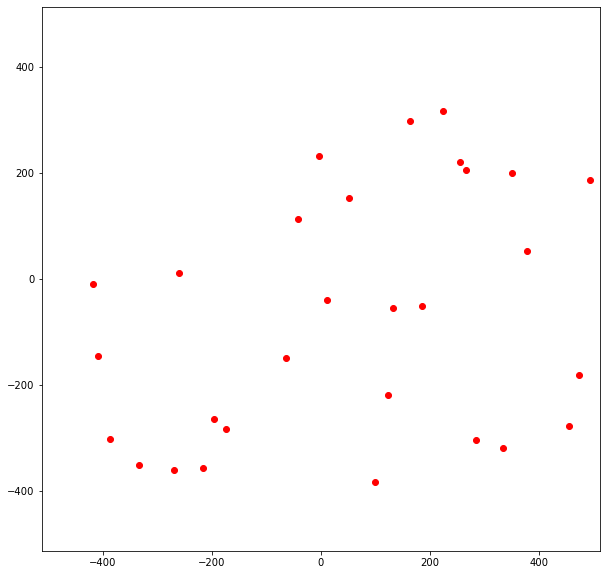

In [33]:
# Display sources in SAMOS Spectral Inst. CCD coordinates

%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(RA_Offsets_IMpix, DEC_Offsets_IMpix, 'ro')
plt.axis([-512, 512, -512, 512])
plt.show()

In [34]:
# OFFsets in in SAMI pixels (SAMOS-SP Channel)
SP_CCD_Scale = 0.133
#
RA_Offsets_SPpix = RA_Offsets / SP_CCD_Scale # in pixels
DEC_Offsets_SPpix = DEC_Offsets / SP_CCD_Scale
print(np.c_[RA_Offsets_SPpix, DEC_Offsets_SPpix])

# OFFsets in in SpecIns pixels (SAMOS-IM Channel)
IM_CCD_Scale = 0.17578125 #180/1024
#
RA_Offsets_IMpix = RA_Offsets / IM_CCD_Scale # in pixels
DEC_Offsets_IMpix = DEC_Offsets / IM_CCD_Scale
print(np.c_[RA_Offsets_IMpix, DEC_Offsets_IMpix])


[[-565.07819549  -13.6556391 ]
 [-552.16691729 -197.52631579]
 [-524.47669173 -407.1924812 ]
 [-450.50075188 -475.18646617]
 [-364.47969925 -485.6887218 ]
 [-352.81353383   14.60300752]
 [-293.34586466 -481.81804511]
 [-264.13984962 -358.09172932]
 [-234.33834586 -382.77744361]
 [ -85.87218045 -201.04511278]
 [ -56.36842105  152.81052632]
 [  -3.42406015  313.34887218]
 [  14.95488722  -54.36541353]
 [  69.79398496  205.53834586]
 [ 135.83909774 -518.7112782 ]
 [ 166.37142857 -295.21353383]
 [ 179.90526316  -74.90977444]
 [ 221.18345865  403.53834586]
 [ 251.17443609  -69.19849624]
 [ 303.03609023  427.35789474]
 [ 346.56090226  297.02706767]
 [ 359.63458647  279.        ]
 [ 386.83759398 -409.95338346]
 [ 453.07218045 -430.9037594 ]
 [ 475.18646617  269.74285714]
 [ 511.29473684   70.57894737]
 [ 617.31879699 -374.76541353]
 [ 642.73533835 -243.86616541]
 [ 669.9112782   251.47218045]]
[[-427.55072  -10.33216]
 [-417.78176 -149.4528 ]
 [-396.83072 -308.09088]
 [-340.85888 -359.53664]


##  Display the sources in a) the Spectral Instrument,  and b) the SAMI/SAMOS field of view, assumed centered in the CCD field, assumed centered in the middle of the 4098x4098 detector

<Figure size 720x216 with 0 Axes>

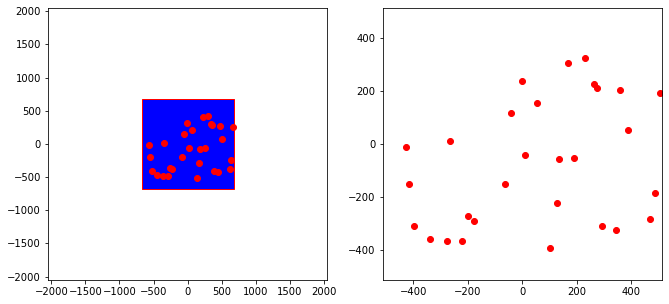

In [35]:
#import matplotlib.pyplot as plt
#import matplotlib.patches as patches
#%matplotlib inline
f = plt.figure(figsize=(10,3))
x1,x2=plt.subplots(1, 2, figsize=(11,5))
x1=plt.subplot(1, 2, 1)
x1.plot(RA_Offsets_SPpix, DEC_Offsets_SPpix, 'ro')
x1.axis([-2048, 2048, -2048, 2048])
rectangle = plt.Rectangle((-675,-675),1350, 1350, fc='blue',ec="red")
plt.gca().add_patch(rectangle)

x2=plt.subplot(1, 2, 2)
x2.plot(RA_Offsets_IMpix, DEC_Offsets_IMpix, 'ro')
x2.axis([-512, 512, -512, 512])

plt.show()


## Display the trace of the spectra in SAMI/SAMOS field of view, assumed 2000 pixels long.

In [50]:
import ipywidgets
%matplotlib notebook

<IPython.core.display.Javascript object>


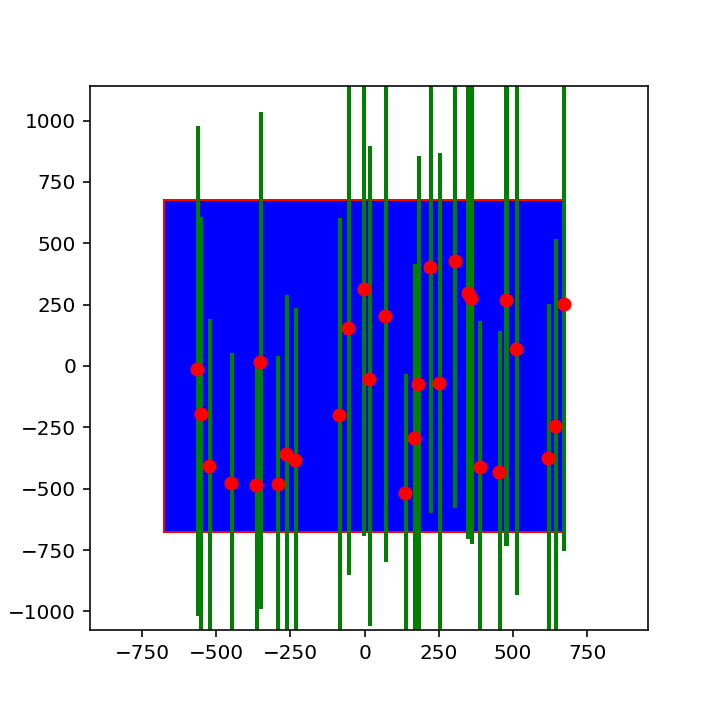

In [51]:
#import matplotlib.pyplot as plt
#import matplotlib.patches as patches
plt.figure(figsize=(5,5))
plt.plot(RA_Offsets_SPpix, DEC_Offsets_SPpix, 'ro')
plt.axis([-2048, 2048, -2048, 2048])
rectangle = plt.Rectangle((-675,-675),1350, 1350, fc='blue',ec="red")
plt.gca().add_patch(rectangle)
for i in range(len(RA_Offsets_IMpix)):
#    print(RA_Offsets_IMpix.iloc[i])
#    print(np.round(RA_Offsets_IMpix.iloc[i]-1),np.round(DEC_Offsets_IMpix.iloc[i]-1000,3, np.round(DEC_Offsets_IMpix.iloc[i]+1000))
    xy = (RA_Offsets_SPpix.iloc[i]-1,np.round(DEC_Offsets_SPpix.iloc[i]-1000))
    rectangle = plt.Rectangle(xy ,7, np.round(DEC_Offsets_SPpix.iloc[i]+2000), fc='green',ec="green")
    plt.gca().add_patch(rectangle)
plt.show()

In [37]:
## Zoom-in
2048/675*16

48.54518518518518

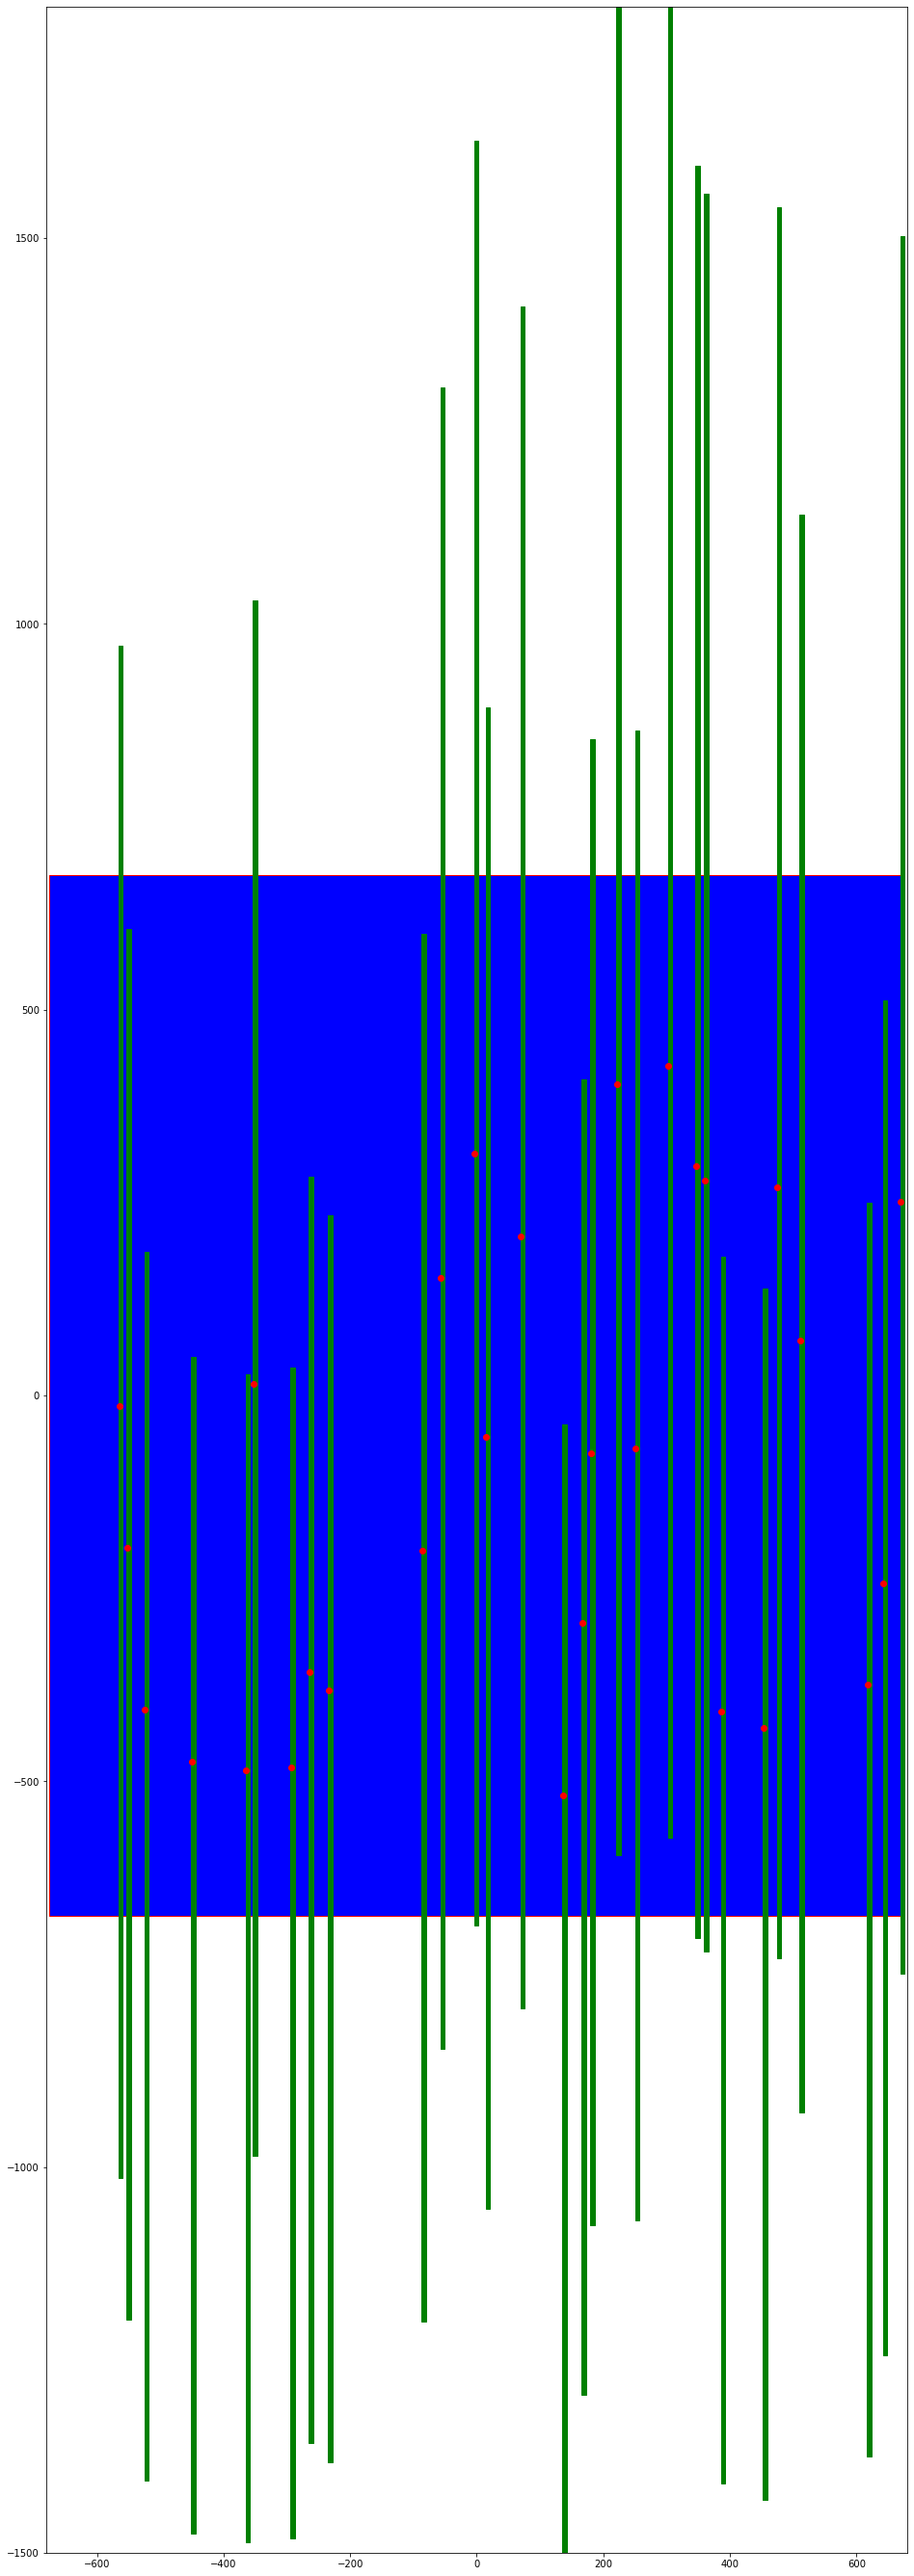

In [43]:
#import matplotlib.pyplot as plt
#import matplotlib.patches as patches
#%matplotlib inline
plt.figure(figsize=(16,48.6))
plt.plot(RA_Offsets_SPpix, DEC_Offsets_SPpix, 'ro')
plt.axis([-680, 680, -1500, 1800])
rectangle = plt.Rectangle((-675,-675),1350, 1350, fc='blue',ec="red")
plt.gca().add_patch(rectangle)
for i in range(len(RA_Offsets_IMpix)):
    xy = (RA_Offsets_SPpix.iloc[i]-1,np.round(DEC_Offsets_SPpix.iloc[i]-1000))
    rectangle = plt.Rectangle(xy ,7, np.round(DEC_Offsets_SPpix.iloc[i]+2000), fc='green',ec="green")
    plt.gca().add_patch(rectangle)
plt.show()

## Export Table

In [36]:
filename  = "DMDmap_Orion_"+str(np.round(RA_Center,13))+"_"+str(np.round(DEC_Center,13))+".csv"

In [37]:
targetlist.to_csv(filename,header=True,index=False)

## CREATE PSEUDO-SAMOS FITS IMAGE

In [38]:
#RA_Center=83.82109750000001 
#DEC_Center=-5.3898675

### Download DSS image from Strasbourg

83.73243350000001 -5.386808
Filename: /Users/danakoeppe/.astropy/cache/download/url/2ad5dfeebc62781336f9b996b0d5651d/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (1056, 1032)   float32   
scale of DSS image:  0.1758522846050928 

to be compared with the default scale of SAMOS
SAMOS scale:  0.17578125


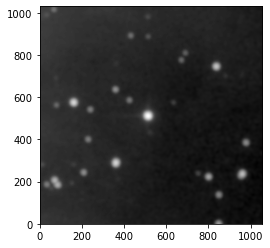

In [51]:
from astroquery.simbad import Simbad                                                            
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.visualization import simple_norm
from astropy import wcs as astropy_wcs
coord = SkyCoord(str(np.round(RA_Center,13))+'  '+str(np.round(DEC_Center,13)),unit=(u.deg, u.deg), frame='fk5') 
from urllib.parse import urlencode
from astropy.io import fits

print(RA_Center,DEC_Center)

w = astropy_wcs.WCS(header={
    'NAXIS1': 1056,         # Width of the output fits/image
    'NAXIS2': 1032,         # Height of the output fits/image
    'WCSAXES': 2,           # Number of coordinate axes
    'CRPIX1': 528.0,        # Pixel coordinate of reference point
    'CRPIX2': 516.0,        # Pixel coordinate of reference point
    'CDELT1': RA_Center,    # [deg] Coordinate increment at reference point
    'CDELT2': DEC_Center,   # [deg] Coordinate increment at reference point
    'CUNIT1': 'deg',        # Units of coordinate increment and value
    'CUNIT2': 'deg',        # Units of coordinate increment and value
    'CTYPE1': 'GLON-MOL',   # galactic longitude, Mollweide's projection
    'CTYPE2': 'GLAT-MOL',   # galactic latitude, Mollweide's projection
    'CRVAL1': 0.0,          # [deg] Coordinate value at reference point
    'CRVAL2': 0.0,          # [deg] Coordinate value at reference point
})
hips = '2MASS/J'#'CDS/P/DSS2/red'
#result = hips2fits.query_with_wcs(
#   hips=hips,
#   wcs=w,
#   get_query_payload=False,
#   format='fits',
#   min_cut=0.5,
#   max_cut=99.5,
#   cmap=Colormap('viridis'),
#)
query_params = { 
             'hips': '2MASS/J',
#             'wcs': w, 
             'ra': RA_Center, 
             'dec': DEC_Center,
             'fov': (3.095 * u.arcmin).to(u.deg).value, 
             'projection': 'TAN',
             'width': 1056, 
             'height': 1032 
             }                                                                                               
url = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params)}' 
hdul = fits.open(url)
hdul.info()
header = hdul[0].header
image = hdul[0].data
#to save
filename  = "Strasbourg_"+str(np.round(RA_Center,13))+"_"+str(np.round(DEC_Center,13))+".fits"
hdul.writeto(filename,overwrite=True)

#print(header)
print('scale of DSS image: ',header['CDELT2']*3600.,'\n')

print("to be compared with the default scale of SAMOS")
print('SAMOS scale: ',180/1024.)

hipsnorm = simple_norm(data=image, stretch='log')
im = plt.imshow(image, origin='lower', cmap='gray',norm=hipsnorm)
plt.show(im)

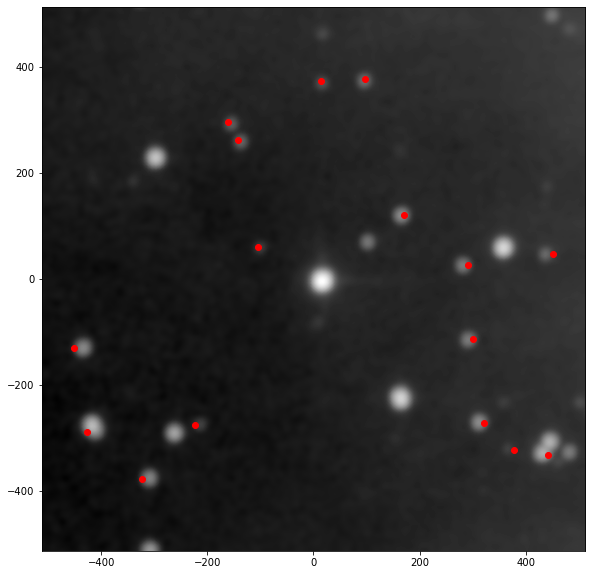

In [54]:
plt.figure(figsize=(10,10))

#overplot pixel offsets with stars to check alignment

im = plt.imshow(np.fliplr(image), origin='lower',cmap='gray',norm=hipsnorm, extent=[-512, 512, -512, 512])

plt.plot(RA_Offsets_IMpix, DEC_Offsets_IMpix, 'ro')
plt.axis([-512, 512, -512, 512])

plt.show(im)

In [40]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1056                                                  
NAXIS2  =                 1032                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                528.0 / Pixel coordinate of reference point            
CRPIX2  =                516.0 / Pixel coordinate of reference point            
CDELT1  = -4.8847856834747E-05 / [deg] Coordinate increment at reference point  
CDELT2  =  4.8847856834748E-05 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'        

### Take a SAMOS SpecInst image, to use the header

In [41]:
hdu_SAMOS = fits.open('./SAMOS_imaging_camera_tests/test_3s_light.fits')
hdu_SAMOS.info()

Filename: ./SAMOS_imaging_camera_tests/test_3s_light.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      88   (1056, 1032)   int16 (rescales to uint16)   


In [42]:
hdr_SAMOS = hdu_SAMOS[0].header
hdr_SAMOS

SIMPLE  =                    T / FITS Standard                                  
BITPIX  =                   16 / FITS Bits/Pixel (-16 signifies [U16])          
NAXIS   =                    2 / Number of Axes                                 
NAXIS1  =                 1056 / Length of Axis 1 (Columns)                     
NAXIS2  =                 1032 / Length of Axis 2 (Rows)                        
BSCALE  =                    1 / Scaling Factor (Default=1)                     
BZERO   =                32768 / Offset Factor (Default=0)                      
DATE-OBS= '2021-03-12T16:44:47.275' / DATE-OBS Format: YYYY-MM-DDThh:mm:ss.sss  
DATE    = '2021-03-12'         / Date Format is YYYY-MM-DD                      
TIME    = '16:44:47.275 to 16:44:50.288' / ~ Start & Stop of Exposure           
EXPTIME =                3.000 / Exposure Time, Sec.                            
N_PRM0  =                   11 / Status                                         
PG0_0   =                   

## Cleanup SAMOS Header

In [43]:
del hdr_SAMOS[11:90]
hdr_SAMOS

SIMPLE  =                    T / FITS Standard                                  
BITPIX  =                   16 / FITS Bits/Pixel (-16 signifies [U16])          
NAXIS   =                    2 / Number of Axes                                 
NAXIS1  =                 1056 / Length of Axis 1 (Columns)                     
NAXIS2  =                 1032 / Length of Axis 2 (Rows)                        
BSCALE  =                    1 / Scaling Factor (Default=1)                     
BZERO   =                32768 / Offset Factor (Default=0)                      
DATE-OBS= '2021-03-12T16:44:47.275' / DATE-OBS Format: YYYY-MM-DDThh:mm:ss.sss  
DATE    = '2021-03-12'         / Date Format is YYYY-MM-DD                      
TIME    = '16:44:47.275 to 16:44:50.288' / ~ Start & Stop of Exposure           
EXPTIME =                3.000 / Exposure Time, Sec.                            

### Add to SAMOS header the parameters from SOAR

see https://fits.gsfc.nasa.gov/fits_dictionary.html

In [44]:
print(0.17578125/3600.)
c = SkyCoord(str(RA_Center)+' '+str(DEC_Center), unit=(u.hourangle, u.deg))
RA_Center_RND = RA_Center + np.random.randn()/3600. # add a 1" stdev error in the telescope pointing... 
DEC_Center_RND = DEC_Center + np.random.randn()/3600.  

4.8828125e-05


In [45]:
#this string is supposed to arrive from the telescope via tk_class_SOAR.py 
SOAR_info_string = "DONE 2002-04-15 17:06:52 05:52:53.81 -52:14:46.54 -03:54:13.05 136.34 42.31 274.64 136.34 42.31 1.484"
SOAR_info_split = SOAR_info_string.split()
SOAR_info_split
hdr_SAMOS['DATE-OBS'] = (SOAR_info_split[1]+'T'+SOAR_info_split[2])
hdr_SAMOS['DATE'] = (SOAR_info_split[1])
hdr_SAMOS['TIME'] = (SOAR_info_split[2],'Start of Exposure')
hdr_SAMOS['CRVAL1'] = (RA_Center_RND) # RA coming from SOAR telescope
hdr_SAMOS['CRVAL2'] = (DEC_Center_RND) # DEC coming from SOAR telescope
hdr_SAMOS['TCS_HA'] = (SOAR_info_split[5],'hour angle')
hdr_SAMOS['TCS_AZ'] = (SOAR_info_split[6],'azimuth')
hdr_SAMOS['TCS_EL'] = (SOAR_info_split[7],'elevation')
hdr_SAMOS['TCS_ROT'] = (SOAR_info_split[8],'rotator angle')
hdr_SAMOS['TCS_DOME'] = (SOAR_info_split[9],'dome angle')
hdr_SAMOS['TCS_ELEV'] = (SOAR_info_split[10],'dome elevation')
hdr_SAMOS['AIRMASS'] = (SOAR_info_split[11],'airmass')


### Add to SAMOS header the parameters from SAMOS

In [46]:
hdr_SAMOS['WCSAXES'] = (2,'Number of coordinate axes')                      
hdr_SAMOS['CRPIX1'] = (528.0,'x pixel coordinate of reference point')            
hdr_SAMOS['CRPIX2'] = (516.0,'y pixel coordinate of reference point')            
hdr_SAMOS['CDELT1'] = (-4.8828125e-05,'[deg] Coordinate increment at reference point')
hdr_SAMOS['CDELT2'] = (4.8828125e-05,'[deg] Coordinate increment at reference point')  
hdr_SAMOS['CUNIT1'] = ('deg','Units of coordinate increment and value')        
hdr_SAMOS['CUNIT2'] = ('deg','Units of coordinate increment and value')        
hdr_SAMOS['CTYPE1'] = ('RA---TAN','Right ascension, gnomonic projection')           
hdr_SAMOS['CTYPE2'] = ('DEC--TAN','Declination, gnomonic projection')   
hdr_SAMOS['RA_DMD'] = (DEC_Center,'RA_center of DMD target list')             
hdr_SAMOS['DEC_DMD'] = (DEC_Center,'DEC_center of DMD target list')            
hdr_SAMOS['RADESYS'] = ('ICRS','Equatorial coordinate system')     

#to be continued with filters etc... see SAMI

In [47]:
hdr_SAMOS

SIMPLE  =                    T / FITS Standard                                  
BITPIX  =                   16 / FITS Bits/Pixel (-16 signifies [U16])          
NAXIS   =                    2 / Number of Axes                                 
NAXIS1  =                 1056 / Length of Axis 1 (Columns)                     
NAXIS2  =                 1032 / Length of Axis 2 (Rows)                        
BSCALE  =                    1 / Scaling Factor (Default=1)                     
BZERO   =                32768 / Offset Factor (Default=0)                      
DATE-OBS= '2002-04-15T17:06:52' / DATE-OBS Format: YYYY-MM-DDThh:mm:ss.sss      
DATE    = '2002-04-15'         / Date Format is YYYY-MM-DD                      
TIME    = '17:06:52'           / Start of Exposure                              
EXPTIME =                3.000 / Exposure Time, Sec.                            
CRVAL1  =    83.73251819765545                                                  
CRVAL2  =   -5.3869431201223

## Finally save the new SAMOS file

In [48]:
hdu_SAMOS[0].header = hdr_SAMOS
hdu_SAMOS[0].data = hdul[0].data
filename  = "SAMOS_"+str(np.round(RA_Center,13))+"_"+str(np.round(DEC_Center,13))+"_.fits"
hdu_SAMOS.writeto(filename,overwrite=True)

In [49]:
print(hdr_SAMOS)

SIMPLE  =                    T / FITS Standard                                  BITPIX  =                  -32 / FITS Bits/Pixel (-16 signifies [U16])          NAXIS   =                    2 / Number of Axes                                 NAXIS1  =                 1056 / Length of Axis 1 (Columns)                     NAXIS2  =                 1032 / Length of Axis 2 (Rows)                        BSCALE  =                    1 / Scaling Factor (Default=1)                     BZERO   =                32768 / Offset Factor (Default=0)                      DATE-OBS= '2002-04-15T17:06:52' / DATE-OBS Format: YYYY-MM-DDThh:mm:ss.sss      DATE    = '2002-04-15'         / Date Format is YYYY-MM-DD                      TIME    = '17:06:52'           / Start of Exposure                              EXPTIME =                3.000 / Exposure Time, Sec.                            CRVAL1  =    83.73251819765545                                                  CRVAL2  =   -5.386943120122353          